In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import cv2 as cv
from datetime import datetime 

In [3]:
img=cv.imread('1.png')

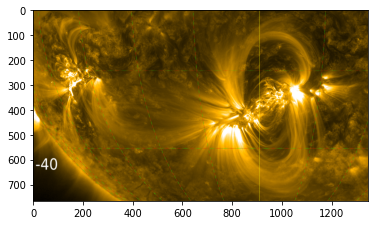

In [4]:
cl_img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)#gray
type(gray_img.shape[:2])
gauss_b=cv.GaussianBlur(gray_img, (3,3), 0)#3*3 kernel
ret,binary=cv.threshold(gauss_b,127,255,cv.THRESH_BINARY)
plt.imshow(cl_img,'gray')#source image

0:00:00.016620


(<matplotlib.image.AxesImage at 0x7f77363a7e20>, Text(0.5, 1.0, 'Roberts'))

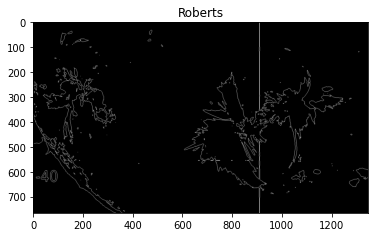

In [5]:
#Roberts 
kernelx=np.array([[-1,0],[0,1]],dtype=int)
kernely=np.array([[0,-1],[1,0]],dtype=int)
a=datetime.now()
x=cv.filter2D(binary,cv.CV_16S,kernelx)
y=cv.filter2D(binary,cv.CV_16S,kernely)
absx=cv.convertScaleAbs(x)
absy=cv.convertScaleAbs(y)
roberts=cv.addWeighted(absx,0.5,absy,0.5,0)
b=datetime.now()
print(b-a)
plt.imshow(roberts,'gray'),plt.title("Roberts")

0:00:00.004260


(<matplotlib.image.AxesImage at 0x7f7736323c70>, Text(0.5, 1.0, 'Prewitt'))

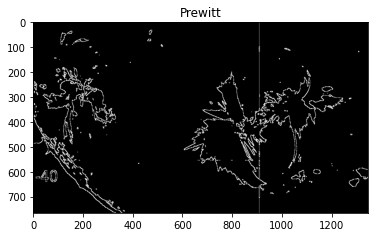

In [6]:
#Prewitt
kernx=np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=int)
kerny=np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)
a=datetime.now()
xx=cv.filter2D(binary,cv.CV_16S,kernx)
yy=cv.filter2D(binary,cv.CV_16S,kerny)
absxx=cv.convertScaleAbs(xx) 
absyy=cv.convertScaleAbs(yy) 
prewitt=cv.addWeighted(absxx, 0.5, absyy, 0.5, 0)
b=datetime.now()
print(b-a)
plt.imshow(prewitt,'gray'),plt.title("Prewitt")

0:00:00.011782


(<matplotlib.image.AxesImage at 0x7f77362917c0>, Text(0.5, 1.0, 'Sobel'))

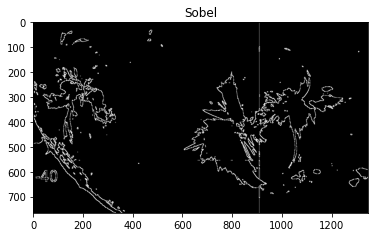

In [7]:
#Sobel
a=datetime.now()
x=cv.Sobel(binary, cv.CV_16S, 1, 0)
y=cv.Sobel(binary, cv.CV_16S, 0, 1) 
absx=cv.convertScaleAbs(x) 
absy=cv.convertScaleAbs(y) 
sobel=cv.addWeighted(absx, 0.5, absy, 0.5, 0)
b=datetime.now()
print(b-a)
plt.imshow(sobel,'gray'),plt.title("Sobel")

0:00:00.004556


(<matplotlib.image.AxesImage at 0x7f773627a820>, Text(0.5, 1.0, 'Canny'))

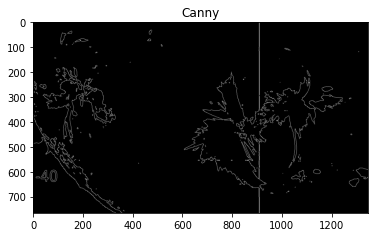

In [8]:
#Canny
a=datetime.now()
threshold=cv.Canny(binary,16,628)
threshold
b=datetime.now()
print(b-a)
plt.imshow(threshold,'gray'),plt.title("Canny")

(<AxesSubplot:title={'center':'Canny by Opencv'}>,
 Text(0.5, 1.0, 'Canny by Opencv'),
 (-0.5, 1345.5, 765.5, -0.5))

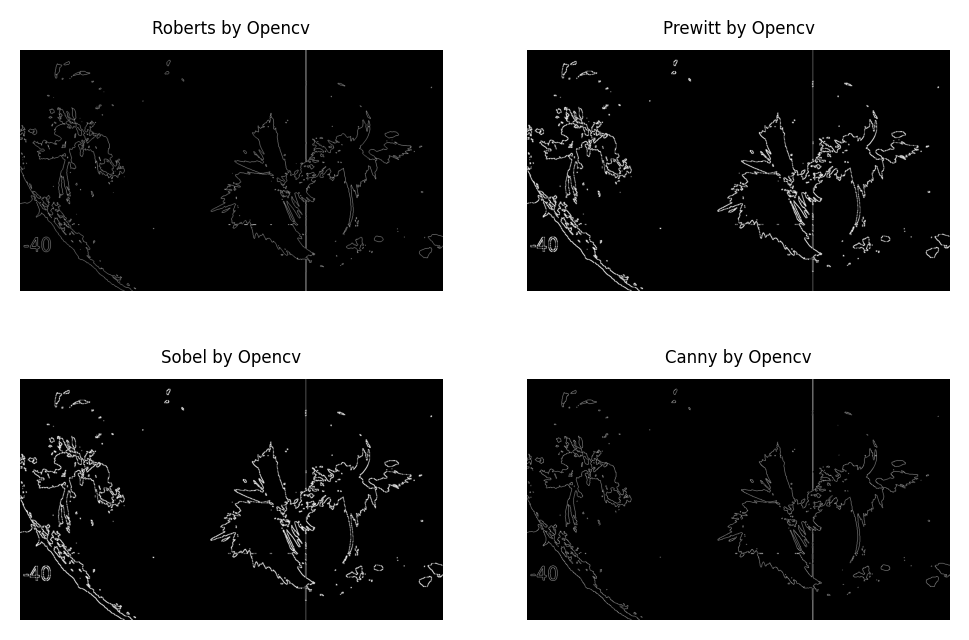

In [117]:
plt.figure(dpi=200)
plt.subplot(2,2,1),plt.imshow(roberts,'gray'),plt.title("Roberts by Opencv",fontsize=6),plt.axis('off')
plt.subplot(2,2,2),plt.imshow(prewitt,'gray'),plt.title("Prewitt by Opencv",fontsize=6),plt.axis('off')
plt.subplot(2,2,3),plt.imshow(sobel,'gray'),plt.title("Sobel by Opencv",fontsize=6),plt.axis('off')
plt.subplot(2,2,4),plt.imshow(threshold,'gray'),plt.title("Canny by Opencv",fontsize=6),plt.axis('off')

0:00:04.134467


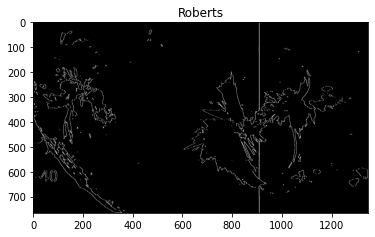

In [97]:
#self-complete!
#Roberts
ret,binary=cv.threshold(gauss_b,127,255,cv.THRESH_BINARY)
def Robert(pic):
    x_len=pic.shape[0]
    y_len=pic.shape[1]
    kernel=[[-1,1],[-1,1]]
    for i in range(x_len):
        for j in range(y_len):
            if (j+2<=y_len) and (i+2<=x_len):
                process_pic=pic[i:i+2,j:j+2]
                list_robert=kernel*process_pic
                pic[i,j]=abs(list_robert.sum())
    return pic
time0=datetime.now()
self_robert_img=Robert(binary)
time1=datetime.now()
plt.imshow(self_robert_img,'gray'),plt.title("Roberts")
print(time1-time0)

0:00:10.961282


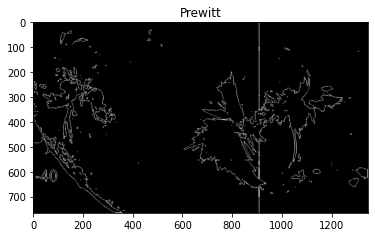

In [98]:
#Prewitt
ret,binary=cv.threshold(gauss_b,127,255,cv.THRESH_BINARY)
def Prewitt(pic):
    x_len=pic.shape[0]
    y_len=pic.shape[1]
    kernelx=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    kernely=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    for i in range(x_len):
        for j in range(y_len):
            if (j+3<=y_len) and (i+3<=x_len):
                process_picx=np.sum(pic[i:i+3,j:j+3]*kernelx)
                process_picy=np.sum(pic[i:i+3,j:j+3]*kernely)
                pic[i,j]=np.sqrt(np.square(process_picx)+
                                 np.square(process_picy))
    return pic
time0=datetime.now()
self_prewitt_img=Prewitt(binary)
time1=datetime.now()
plt.imshow(self_prewitt_img,'gray'),plt.title("Prewitt")
print(time1-time0)

0:00:10.963393


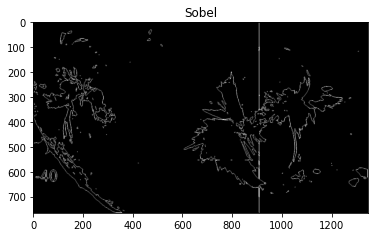

In [99]:
#Sobel
ret,binary=cv.threshold(gauss_b,127,255,cv.THRESH_BINARY)
def Sobel(pic):
    x_len=pic.shape[0]
    y_len=pic.shape[1]
    kernelx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    kernely=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    for i in range(x_len):
        for j in range(y_len):
            if (j+3<=y_len) and (i+3<=x_len):
                process_picx=np.sum(pic[i:i+3,j:j+3]*kernelx)
                process_picy=np.sum(pic[i:i+3,j:j+3]*kernely)
                pic[i,j]=np.sqrt(np.square(process_picx)+
                                 np.square(process_picy))
    return pic
time0=datetime.now()
self_sobel_img=Sobel(binary)
time1=datetime.now()
plt.imshow(self_sobel_img,'gray'),plt.title("Sobel")
print(time1-time0)

(3, 3)


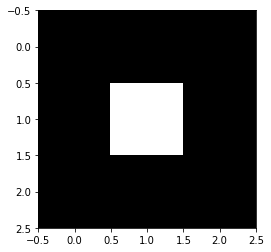

In [101]:
#Canny
from astropy.modeling.models import custom_model
from astropy.convolution import convolve_models
from scipy.signal import fftconvolve 
from astropy.convolution import Gaussian2DKernel
import math
ret,binary=cv.threshold(gauss_b,127,255,cv.THRESH_BINARY)
#generate a 2-d kernel
gaussian_2D_kernel = Gaussian2DKernel(0.3)
plt.imshow(gaussian_2D_kernel, 'gray')
print(np.shape(gaussian_2D_kernel))
def creat_gauss_kernel(kernel_size=3, sigma=1, k=1):
    '''
    generate a 2-d gaussian kernel
    referred to CSDN
    '''
    if sigma == 0:
        sigma = ((kernel_size - 1) * 0.5 - 1) * 0.3 + 0.8
    X = np.linspace(-k, k, kernel_size)
    Y = np.linspace(-k, k, kernel_size)
    x, y = np.meshgrid(X, Y)
    x0 = 0
    y0 = 0
    gauss = 1/(2*np.pi*sigma**2) * np.exp(- ((x -x0)**2 + (y - y0)**2)/ (2 * sigma**2))
    return gauss

In [102]:
def guassian_blur(img,kernel):
    '''guassian convolution of 2 dimensions'''
    img=np.pad(img,((1,1),(1,1)),constant_values=0)
    x_len,y_len=img.shape
    x_len=x_len-2
    y_len=y_len-2
    process_img=np.zeros([x_len,y_len])
    for i in range (x_len):
        for j in range (y_len):
            process_img[i,j]=np.sum(img[i:i+3, j:j+3]*kernel)
    return process_img

def partial_derivative(img):
    '''calculate the partial derivative of the img
    return partial x, partial y, and gradient of img'''
    img=np.pad(img,((1,1),(1,1)),constant_values=0)
    x_len,y_len=img.shape
    dx=np.zeros([x_len-1,y_len-1])
    dy=dx
    grad=dy
    ranx=x_len-1
    rany=y_len-1
    for i in range(ranx):
        for j in range(rany):
            dx[i,j]=img[i+1,j]-img[i,j]
            dy[i,j]=img[i,j+1]-img[i,j]
            grad[i,j]=np.sqrt(np.square(dx[i,j])+np.square(dy[i,j]))
    return dx,dy,grad

In [103]:
def non_maximum_suppression(dx,dy,df):
    '''
    non-maximum suppression, extract the maximum pixel
    as the edge of image;
    compare the current pixel with the 3*3 surrounding 
    pixels
    '''
    df=np.pad(df,((1,1),(1,1)),constant_values=0)
    x_len,y_len=df.shape
    ranx=x_len-1
    rany=y_len-1
    for i in range(ranx):
        for j in range(rany):
            if (df[i,j]!=0):
                gx=math.fabs(dx[i-1,j-1])
                gy=math.fabs(dy[i-1,j-1])
                max_g=max(gx,gy)
                min_g=gx+gy-max_g
                weight=min_g*1.0/max_g
                if(gx * gy >0):
                    grad_1=df[i+1,j+1]
                    grad_2=df[i-1,j-1]
                else:
                    grad_1=df[i+1,j-1]
                    grad_2=df[i-1,j+1]
                if(gx>gy):
                    grad_3=df[i+1,j]
                    grad_4=df[i-1,j]
                else:
                    grad_3=df[i,j+1]
                    grad_4=df[i,j-1]
                t1=weight*grad_3+(1-weight)*grad_1
                t2=weight*grad_4+(1-weight)*grad_2
                if (df[i,j]<=t1 or df[i,j]<=t2):
                    df[i,j]=0
                
    return df

def double_threshold(df,low,high):
    '''
    low is the lower threshold
    high is the higher
    >high, strong edge
    <low, zero edge
    between, weak edge
    '''
    x,y=df.shape
    ranx=x-1
    rany=y-1
    for i in range(1,ranx):
        for j in range(1,rany):
            max_df=max(df[i,j],df[i+1,j],df[i-1,j],df[i,j+1],df[i,j-1],
                      df[i-1,j-1],df[i+1,j+1],df[i+1,j-1],df[i-1,j+1])
            min_df=min(df[i,j],df[i+1,j],df[i-1,j],df[i,j+1],df[i,j-1],
                      df[i-1,j-1],df[i+1,j+1],df[i+1,j-1],df[i-1,j+1])
            if(max_df>high):
                df[i,j]=1
            elif(min_df<low):
                df[i,j]=0
            else:
                df[i,j]=0.6
    return df

0:00:09.874636


(<matplotlib.image.AxesImage at 0x7fbcadcae250>, Text(0.5, 1.0, 'Canny'))

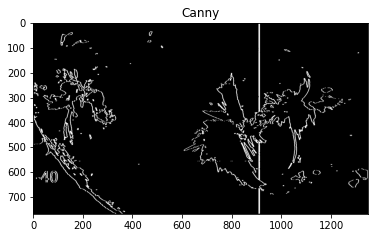

In [104]:
a=datetime.now()
kernel=creat_gauss_kernel()
gray_proc=guassian_blur(binary,kernel)
partial=partial_derivative(gray_proc)
dx=partial[0]
dy=partial[1]
df=partial[2]
new_df=non_maximum_suppression(dx,dy,df)
low_thre=0.1*np.max(new_df)
high_thre=0.2*np.max(new_df)
result_canny=double_threshold(new_df,low_thre,high_thre)
b=datetime.now()
print(b-a)
plt.imshow(result_canny,'gray'),plt.title("Canny")

(<AxesSubplot:title={'center':'Canny'}>,
 Text(0.5, 1.0, 'Canny'),
 (-0.5, 1348.5, 768.5, -0.5))

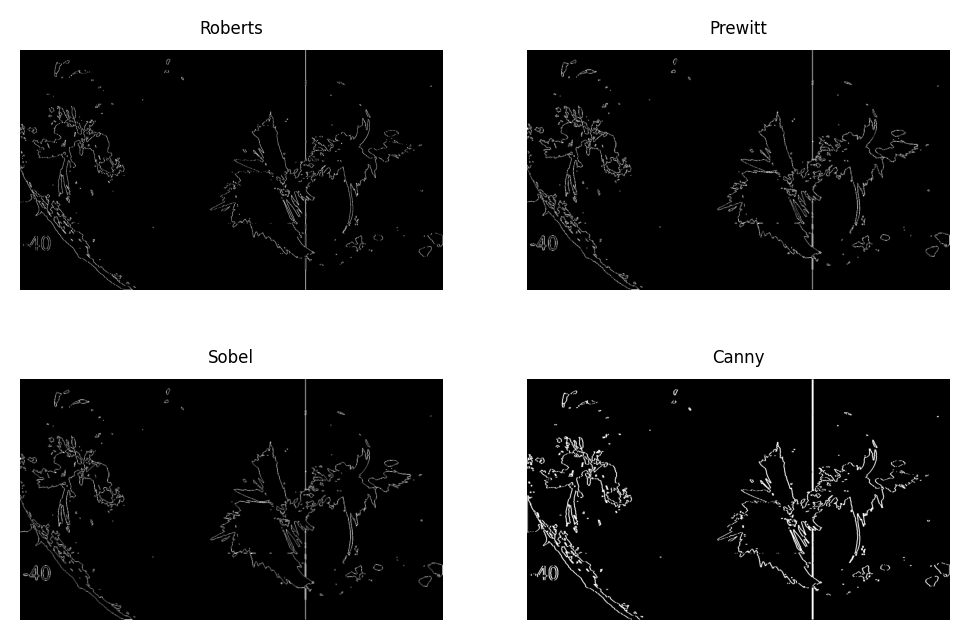

In [113]:
plt.figure(dpi=200)
#plt.subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=0.2,wspace=0.25)
plt.subplot(2,2,1),plt.imshow(self_robert_img,'gray'),plt.title("Roberts",fontsize=6),plt.axis('off')
plt.subplot(2,2,2),plt.imshow(self_prewitt_img,'gray'),plt.title("Prewitt",fontsize=6),plt.axis('off')
plt.subplot(2,2,3),plt.imshow(self_sobel_img,'gray'),plt.title("Sobel",fontsize=6),plt.axis('off')
plt.subplot(2,2,4),plt.imshow(result_canny,'gray'),plt.title("Canny",fontsize=6),plt.axis('off')